<a href="https://colab.research.google.com/github/bachtiar09/PredictCustomerPersonalitytoBoostMarketingCampaignbyUsingMachineLearning/blob/main/Predict_Customer_Personality_to_Boost_Marketing_Campaign_by_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from scipy import stats

from datetime import datetime

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings

In [ ]:
# read data
df = pd.read_csv('marketing_campaign_data.csv')
pd.set_option('display.max_columns',None)
df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
965,965,7801,1959,S1,Bertunangan,54753000.0,0,1,12-09-2013,87,197000,107000,227000,7000,59000,131000,3,5,2,11,4,0,0,0,0,0,0,3,11,0
1848,1848,4609,1966,S3,Menikah,57705000.0,0,1,11-01-2014,14,383000,0,53000,6000,4000,40000,3,8,1,6,6,0,0,0,0,0,0,3,11,0
405,405,194,1965,S1,Menikah,48006000.0,1,1,09-06-2014,55,23000,0,11000,3000,2000,2000,1,1,0,3,6,0,0,0,0,0,0,3,11,0
176,176,10314,1948,S3,Menikah,83837000.0,0,0,16-12-2012,79,847000,66000,119000,86000,89000,111000,1,9,10,5,4,0,1,0,1,0,0,3,11,1
2179,2179,4541,1955,S1,Bertunangan,38946000.0,0,1,24-10-2013,84,116000,6000,82000,6000,6000,41000,2,3,1,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

##  Feature Engineering

In [ ]:
#total acc cmp
df['Total_Acc_Cmp'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

In [ ]:
# Total Purchases
df['total_purchases'] = ( df['NumDealsPurchases'] + df['NumWebPurchases'] 
                        + df['NumCatalogPurchases'] + df['NumStorePurchases'])

In [ ]:
df['conversion_rate'] = np.round(df['Response'] / df['NumWebVisitsMonth'], 2)
df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Acc_Cmp,total_purchases,conversion_rate
1736,1736,7500,1967,S1,Lajang,79146000.0,1,1,24-04-2014,33,245000,16000,223000,21000,43000,16000,2,8,1,8,6,0,0,0,0,0,0,3,11,0,0,19,0.0
227,227,709,1952,S1,Cerai,51537000.0,0,1,09-12-2012,27,787000,20000,204000,0,0,92000,3,2,2,11,8,0,0,0,0,0,0,3,11,0,0,18,0.0
1147,1147,5430,1956,S1,Bertunangan,54450000.0,1,1,14-09-2012,0,454000,0,171000,8000,19000,32000,12,9,2,8,8,0,0,0,0,0,0,3,11,0,0,31,0.0
1013,1013,1970,1968,S2,Bertunangan,34053000.0,0,1,10-09-2012,14,63000,0,21000,7000,0,12000,1,3,0,3,8,0,0,0,0,0,0,3,11,0,0,7,0.0
26,26,2404,1976,S1,Menikah,53359000.0,1,1,27-05-2013,4,173000,4000,30000,3000,6000,41000,4,5,1,4,7,0,0,0,0,0,0,3,11,0,0,14,0.0


In [ ]:
df['Year_Birth'].sort_values()

239     1893
339     1899
192     1900
1950    1940
424     1941
        ... 
747     1995
1850    1995
696     1995
1170    1996
46      1996
Name: Year_Birth, Length: 2240, dtype: int64

In [ ]:
# umur
time = datetime.now().year
df['age'] = time - df['Year_Birth']
# grup age
age_list=[]
for i in df['age']:
    if i >= 0 and i <= 1:
        group = 'Infant'
    elif i >= 2 and i <= 4:
        group = 'balita'
    elif i >= 5 and i <= 12:
        group = 'Anak-anak'
    elif i >= 13 and i <= 16:
        group = 'Remaja awal'
    elif i >= 17 and i <= 25:
        group = 'Remaja akhir'
    elif i >= 26 and i <= 35:
        group = 'Dewasa awal'
    elif i >= 36 and i <=45:
        group = 'Dewasa akhir'
    elif i >= 46 and i <= 55:
        group = "lansia awal"
    elif i >= 56 and i <=65 :
        group = "Lansia akhir"
    else:
        group = 'manula'
    age_list.append(group)

df['Age_Group'] = age_list

In [ ]:
# total childs
df['total_children'] = df['Kidhome'] + df['Teenhome']

In [ ]:
# total spend
df['Total_spend'] = df[['MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

In [ ]:
age_dict = {'Dewasa awal':1,'Dewasa akhir':2,'lansia awal':3, 'Lansia akhir':4, 'manula':5}

In [ ]:
df_task1 = df.groupby('Age_Group')['conversion_rate'].sum().reset_index()
df_task1['percentage'] = np.round(df_task1['conversion_rate']/(df_task1['conversion_rate'].sum())*100,2)
df_task1.reset_index().sort_values('Age_Group', key = lambda x : x.apply (lambda x : age_dict[x]))

,index,Age_Group,conversion_rate,percentage
1,1,Dewasa awal,8.02,8.27
0,0,Dewasa akhir,23.09,23.81
3,3,lansia awal,26.81,27.64
2,2,Lansia akhir,16.27,16.78
4,4,manula,22.79,23.50


[Text(0, 2, '23.09'),
 Text(0, 2, '8.02'),
 Text(0, 2, '16.27'),
 Text(0, 2, '26.81'),
 Text(0, 2, '22.79')]

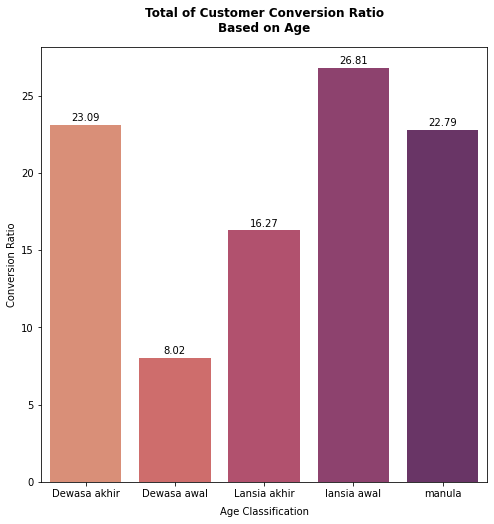

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title("Total of Customer Conversion Ratio\nBased on Age", fontsize=12, color='black', weight='bold', pad=15)
sns.barplot(x='Age_Group', y='conversion_rate', data=df_task1, palette='flare')
plt.ylabel('Conversion Ratio')
plt.xlabel('Age Classification', labelpad=8)
plt.bar_label(ax.containers[0], padding=2)
#plt.bar_label(ax.containers[0], ['19.39%', '5.36%', '21.81%', '32.66%', '20.78%'], label_type='center', color='white', weight='bold')


<Axes: xlabel='age', ylabel='conversion_rate'>

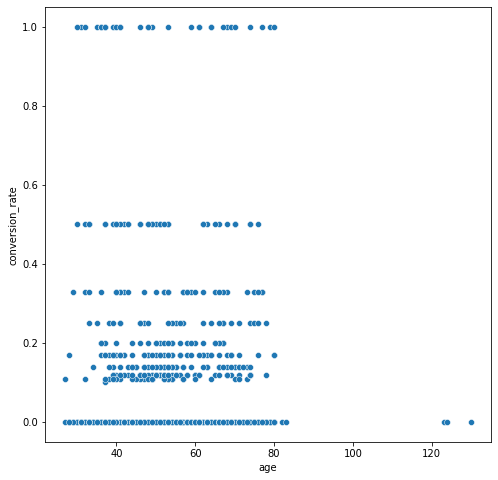

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=df, x="age", y="conversion_rate")

In [ ]:
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Acc_Cmp,total_purchases,conversion_rate,age,Age_Group,total_children,Total_spend
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,25,0.14,66,manula,0,1617000
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0,6,0.00,69,manula,2,27000
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,21,0.00,58,Lansia akhir,0,776000
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0,8,0.00,39,Dewasa akhir,1,53000
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0,19,0.00,42,Dewasa akhir,1,422000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0,0,18,0.00,56,Lansia akhir,1,1341000
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0,1,22,0.00,77,manula,3,444000
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0,1,19,0.00,42,Dewasa akhir,0,1241000
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0,0,23,0.00,67,manula,1,843000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

## EDA

#Descriptive statistics

In [ ]:
# drop data rendents
df1=df.copy()
df1=df1.drop(columns=['Unnamed: 0','ID', 'Year_Birth','Kidhome','Dt_Customer','Teenhome','MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
                  'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
                  'AcceptedCmp1','AcceptedCmp2','Z_CostContact','Z_Revenue','Response'])
df1.head()

,Education,Marital_Status,Income,Recency,Complain,Total_Acc_Cmp,total_purchases,conversion_rate,age,Age_Group,total_children,Total_spend
0,S1,Lajang,58138000.0,58,0,0,25,0.14,66,manula,0,1617000
1,S1,Lajang,46344000.0,38,0,0,6,0.00,69,manula,2,27000
2,S1,Bertunangan,71613000.0,26,0,0,21,0.00,58,Lansia akhir,0,776000
3,S1,Bertunangan,26646000.0,26,0,0,8,0.00,39,Dewasa akhir,1,53000
4,S3,Menikah,58293000.0,94,0,0,19,0.00,42,Dewasa akhir,1,422000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Education        2240 non-null   object 
 1   Marital_Status   2240 non-null   object 
 2   Income           2216 non-null   float64
 3   Recency          2240 non-null   int64  
 4   Complain         2240 non-null   int64  
 5   Total_Acc_Cmp    2240 non-null   int64  
 6   total_purchases  2240 non-null   int64  
 7   conversion_rate  2229 non-null   float64
 8   age              2240 non-null   int64  
 9   Age_Group        2240 non-null   object 
 10  total_children   2240 non-null   int64  
 11  Total_spend      2240 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 210.1+ KB


In [ ]:
df1.shape

(2240, 12)

In [ ]:
# cek duplicat
df1.duplicated().sum()

183

In [ ]:
#cek mising value
df1.isna().sum()

Education           0
Marital_Status      0
Income             24
Recency             0
Complain            0
Total_Acc_Cmp       0
total_purchases     0
conversion_rate    11
age                 0
Age_Group           0
total_children      0
Total_spend         0
dtype: int64

In [ ]:
# separate columns
cat = []
num = []
dat = []
for i in df1.columns: 
    if df1[i].dtype == 'O':
        cat.append(i)
    elif df1[i].dtype == 'int64' or df1[i].dtype == 'float64':
        num.append(i)
    else:
        dat.append(i)

In [ ]:
#summary statistic
df[num].describe()

,Income,Recency,Complain,Total_Acc_Cmp,total_purchases,conversion_rate,age,total_children,Total_spend
count,2.216000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2229.000000,2240.000000,2240.000000,2.240000e+03
mean,5.224725e+07,49.109375,0.009375,0.297768,14.862054,0.043508,54.194196,0.950446,6.057982e+05
std,2.517308e+07,28.962453,0.096391,0.678381,7.677173,0.142827,11.984069,0.751803,6.022493e+05
min,1.730000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,5.000000e+03
25%,3.530300e+07,24.000000,0.000000,0.000000,8.000000,0.000000,46.000000,0.000000,6.875000e+04
50%,5.138150e+07,49.000000,0.000000,0.000000,15.000000,0.000000,53.000000,1.000000,3.960000e+05
75%,6.852200e+07,74.000000,0.000000,0.000000,21.000000,0.000000,64.000000,1.000000,1.045500e+06
max,6.666660e+08,99.000000,1.000000,4.000000,44.000000,1.000000,130.000000,3.000000,2.525000e+06


In [ ]:
#summary statistic
df[cat].describe()

,Education,Marital_Status,Age_Group
count,2240,2240,2240
unique,5,6,5
top,S1,Menikah,lansia awal
freq,1127,864,732


#Univariate Analysis

In [ ]:
# outlier
list(enumerate(num))

[(0, 'Income'),
 (1, 'Recency'),
 (2, 'Complain'),
 (3, 'Total_Acc_Cmp'),
 (4, 'total_purchases'),
 (5, 'conversion_rate'),
 (6, 'age'),
 (7, 'total_children'),
 (8, 'Total_spend')]

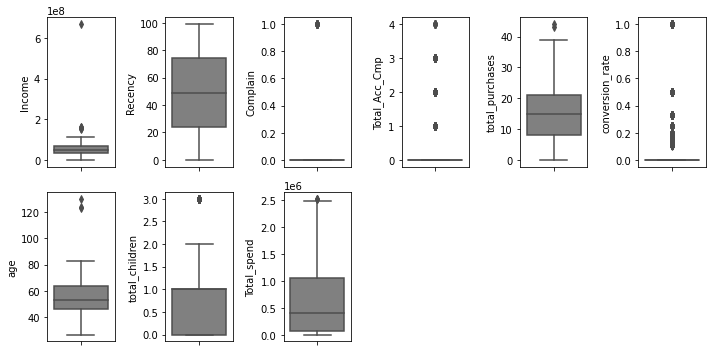

In [ ]:
plt.figure(figsize = (10,5))
for i in range(0, len(num)):
    plt.subplot(2,6, i+1)
    sns.boxplot(y=df1[num[i]], color='gray', orient='v')
    plt.tight_layout()

<ipython-input-85-787f3371abf4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num[i]], color='gray')
<ipython-input-85-787f3371abf4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num[i]], color='gray')
<ipython-input-85-787f3371abf4>:5: UserWarning: 

`distplot` is a deprecated funct

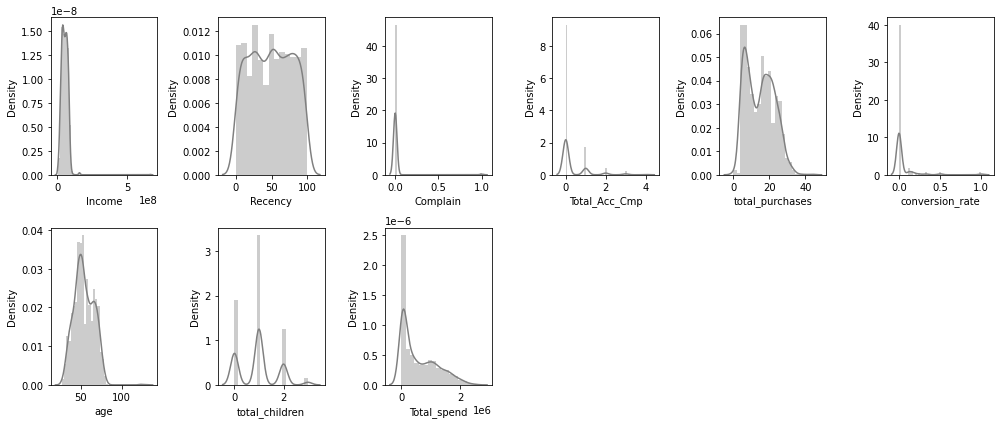

In [ ]:
#data distribution
plt.figure(figsize = (14,6))
for i in range(0, len(num)):
    plt.subplot(2,6, i+1)
    sns.distplot(df[num[i]], color='gray')
    plt.tight_layout()

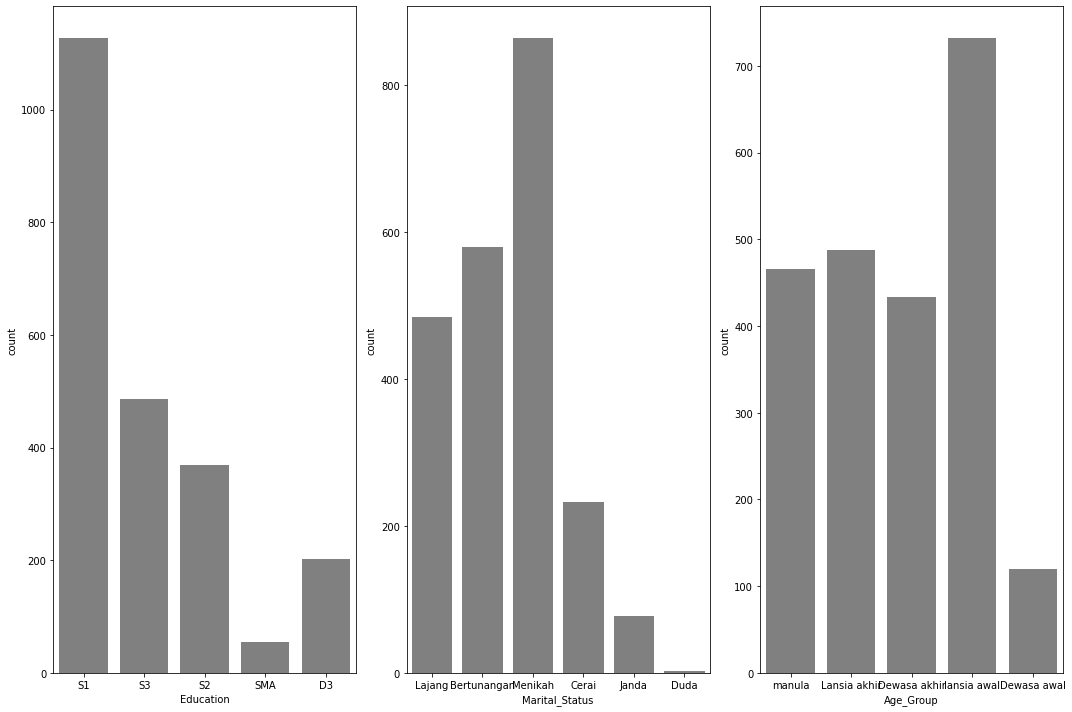

In [ ]:
plt.figure(figsize = (15,10))
for i in range(0, len(cat)):
   plt.subplot(1, len(cat), i+1)
   sns.countplot(x=df[cat[i]], color='gray')
   plt.tight_layout()

##Multivariate Analysis

<Axes: >

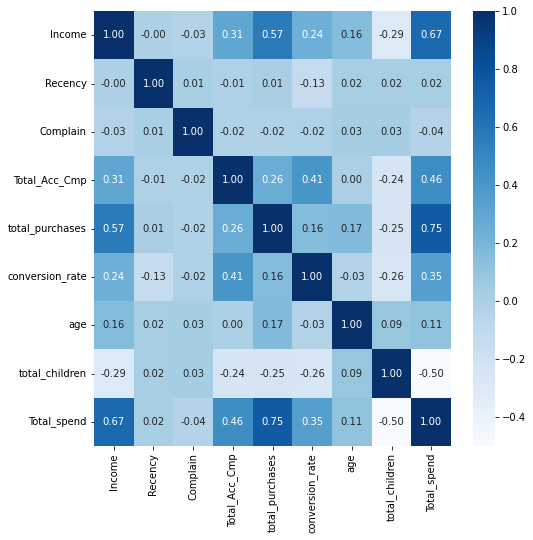

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df1.corr(), cmap='Blues', annot=True, fmt='.2f')

### Data Cleaning & Preprocessing

#Data cleaning

In [ ]:
#hadle mising value
df1.dropna()
#handle duplicate
df1.drop_duplicates()

,Education,Marital_Status,Income,Recency,Complain,Total_Acc_Cmp,total_purchases,conversion_rate,age,Age_Group,total_children,Total_spend
0,S1,Lajang,58138000.0,58,0,0,25,0.14,66,manula,0,1617000
1,S1,Lajang,46344000.0,38,0,0,6,0.00,69,manula,2,27000
2,S1,Bertunangan,71613000.0,26,0,0,21,0.00,58,Lansia akhir,0,776000
3,S1,Bertunangan,26646000.0,26,0,0,8,0.00,39,Dewasa akhir,1,53000
4,S3,Menikah,58293000.0,94,0,0,19,0.00,42,Dewasa akhir,1,422000
...,...,...,...,...,...,...,...,...,...,...,...,...
2233,S1,Bertunangan,666666000.0,23,0,0,11,0.00,46,lansia awal,1,62000
2235,S1,Menikah,61223000.0,46,0,0,18,0.00,56,Lansia akhir,1,1341000
2237,S1,Cerai,56981000.0,91,0,1,19,0.00,42,Dewasa akhir,0,1241000
2238,S2,Bertunangan,69245000.0,8,0,0,23,0.00,67,manula,1,843000


In [ ]:
#hadnle outlier
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([True] * len(df1))

for col in ['Income','Recency','Complain','Total_Acc_Cmp','total_purchases','conversion_rate','age','total_children','Total_spend']:

      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      low_limit = Q1 - (IQR * 1.5)
      high_limit = Q3 + (IQR * 1.5)

      filtered_entries = ((df1[col] >= low_limit) & (df1[col] <= high_limit)) & filtered_entries

df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 2240
Jumlah baris setelah memfilter outlier: 1534


In [ ]:
# label encoding
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 1 to 2238
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Education        1534 non-null   object 
 1   Marital_Status   1534 non-null   object 
 2   Income           1534 non-null   float64
 3   Recency          1534 non-null   int64  
 4   Complain         1534 non-null   int64  
 5   Total_Acc_Cmp    1534 non-null   int64  
 6   total_purchases  1534 non-null   int64  
 7   conversion_rate  1534 non-null   float64
 8   age              1534 non-null   int64  
 9   Age_Group        1534 non-null   object 
 10  total_children   1534 non-null   int64  
 11  Total_spend      1534 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 155.8+ KB


In [ ]:
# label
mapping_pendidikan = {
    'D3' : 0,
    'SMA' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' :4
    }
map_age = {
    'Dewasa awal': 1,
    'Dewasa akhir' :2,
    'lansia awal' : 3,
    'Lansia akhir' : 4,
    'manula' :5
}

In [ ]:
df1['pendidikan'] = df1['Education'].map(mapping_pendidikan)
df1['cat_usia'] = df1['Age_Group'].map(map_age)

<ipython-input-92-30d686728614>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pendidikan'] = df1['Education'].map(mapping_pendidikan)
<ipython-input-92-30d686728614>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cat_usia'] = df1['Age_Group'].map(map_age)


In [ ]:
# ohe
for i in ['Marital_Status']:
    onehots = pd.get_dummies(df1[i], prefix=i)
    df1 = df1.join(onehots)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 1 to 2238
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Education                   1534 non-null   object 
 1   Marital_Status              1534 non-null   object 
 2   Income                      1534 non-null   float64
 3   Recency                     1534 non-null   int64  
 4   Complain                    1534 non-null   int64  
 5   Total_Acc_Cmp               1534 non-null   int64  
 6   total_purchases             1534 non-null   int64  
 7   conversion_rate             1534 non-null   float64
 8   age                         1534 non-null   int64  
 9   Age_Group                   1534 non-null   object 
 10  total_children              1534 non-null   int64  
 11  Total_spend                 1534 non-null   int64  
 12  pendidikan                  1534 non-null   int64  
 13  cat_usia                    1534 

## feature selection
Recency : Date of Last of Purchases : Recency

Frequency : Total Number of Orders : Total_Purchases

Monetization : Total order value : Total_spend

Loyalty : Total campaign accepted : Total_accepted_cmp

https://www.barilliance.com/rfm-analysis/#:~:text=RFM%20analysis%20is%20a%20data,much%20they%27ve%20spent%20overall

###Feature Transformation

In [ ]:
feature = ['Recency','Total_Acc_Cmp','total_purchases','Total_spend']
x = df1[feature].values
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x)
new_df = pd.DataFrame(data= x_std, columns=feature)
new_df.sample(5)

,Recency,Total_Acc_Cmp,total_purchases,Total_spend
325,1.484990,0.0,0.694493,0.130913
671,-0.691464,0.0,0.296181,1.072313
1455,-0.024486,0.0,1.756659,1.159367
401,0.186139,0.0,-0.898756,-0.816561
526,-0.796776,0.0,1.358347,1.094582


### Modeling

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

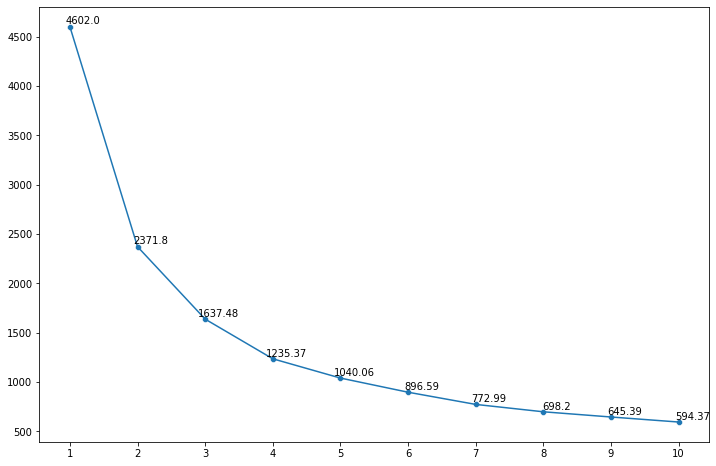

In [ ]:
# Elbow method
inertia=[]

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(new_df)
    inertia.append(np.round(kmeans.inertia_ ,2))

x = range(1,11)
    
plt.figure(figsize=(12,8))
sns.lineplot(x=x, y=inertia)    
sns.scatterplot(x=x, y=inertia)

for i, label in enumerate(inertia):
    plt.text(x[i] + 0.2, inertia[i] + 5, label, ha='center', va='bottom')
    
plt.xticks(range(1,11 ,1))
plt.show()

##K-means

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df.values)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [ ]:
new_df['km_labels']=kmeans.labels_
new_df

,Recency,Total_Acc_Cmp,total_purchases,Total_spend,km_labels
0,-0.445735,0.0,-1.031527,-0.887419,3
1,-0.866984,0.0,0.960035,0.628944,0
2,-0.866984,0.0,-0.765985,-0.834782,3
3,1.520094,0.0,0.694493,-0.087735,2
4,-1.218025,0.0,1.092805,0.507473,0
...,...,...,...,...,...
1529,0.712700,0.0,1.756659,1.181636,2
1530,-0.024486,0.0,-1.297068,-0.897542,3
1531,1.063741,0.0,-1.297068,-0.881346,1
1532,-0.164902,0.0,0.561722,1.772795,2


<Axes: xlabel='Recency', ylabel='total_purchases'>

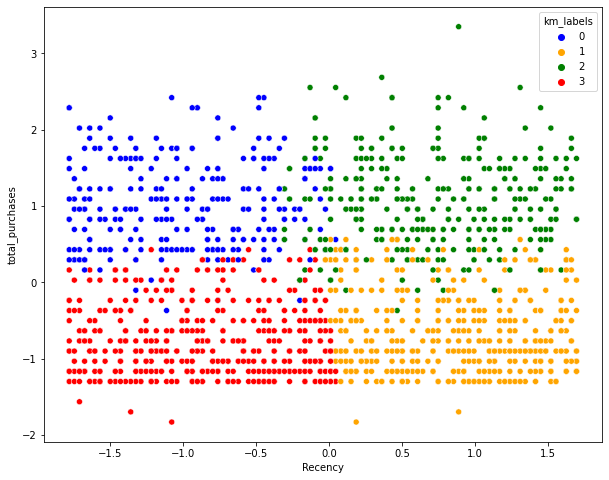

In [ ]:
#visualisasi
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=new_df, x='Recency', y='total_purchases', hue='km_labels',palette=['blue','orange','green','red'])

In [ ]:
#statistic
new_df.groupby('km_labels').agg(['mean','median', 'max', 'min'])

Recency                               Total_Acc_Cmp              \
               mean    median       max       min          mean median  max   
km_labels                                                                     
0         -0.972425 -0.972296  0.045722 -1.779690           0.0    0.0  0.0   
1          0.881337  0.923325  1.695614 -0.024486           0.0    0.0  0.0   
2          0.727994  0.712700  1.695614 -0.305319           0.0    0.0  0.0   
3         -0.843835 -0.831880  0.045722 -1.779690           0.0    0.0  0.0   

               total_purchases                               Total_spend  \
           min            mean    median       max       min        mean   
km_labels                                                                  
0          0.0        1.024956  0.960035  2.420513 -0.367673    0.843386   
1          0.0       -0.647099 -0.765985  0.694493 -1.828151   -0.678162   
2          0.0        1.052042  0.960035  3.349908 -0.367673    1.202041   
3          0.0       -0.740929 -0.898756  0.428952 -1.828151   -0.714149   

                                         
             median       max       min  
km_labels                                
0          0.728145  3.293207 -0.381290  
1         -0.790242  0.679556 -0.931958  
2          1.115840  3.997738 -0.130250  
3         -0.812512  0.497350 -0.929934

### silhouette score

In [ ]:
silhouette_score(new_df, kmeans.labels_)

0.5799481090429165

Nilai silhouette score 0.57994 yang berate mendekati 1 maka menunjukan bahwa cluster tidak tumpah tindih dan score yang postif menunjukan bahwa sampel telah ditugaskan ke cluster yang benar, karena masing masing cluster tidak mirip



##Potential impact

In [ ]:
df1['cluster']= kmeans.labels_

In [ ]:
df2=df1.groupby(['cluster']).agg({"Recency":'sum',
                            "total_purchases":'sum',
                            "Total_spend":'sum'})
df2['potensial_score'] = np.round(((df2['Recency']/df2['Recency'].sum()*100)*0.3) +
                                  ((df2['total_purchases']/df2['total_purchases'].sum()*100)*0.3)+
                                  ((df2['Total_spend']/df2['Total_spend'].sum()*100)*0.6),2)
df2.reset_index()

,cluster,Recency,total_purchases,Total_spend,potensial_score
0,0,6255,5845,239883000,30.88
1,1,34794,4083,59836000,24.25
2,2,24431,7419,362205000,50.41
3,3,12290,3775,51902000,14.47


**petensial_score adalah kalkulasi dari presentase Recency+total_Purchases+Total_spend**

berdsarkan grafik di atas dapat kita lihat bahsawa cutomer cluster 2 adalah adalah cluster dengan score tertinggi yaitu 50.41 point dan yang terendah adalah customer dengan cluster 3 dengan 114.47 point. Sehingga dapat kita simpulkan bahwa untuk marketing campaign yang akan dilakukan alangkan lebih lebik untuk berfokus pada cutomer cluster 2 memiliki kemungkinan lebih besar untuk campaign untuk diterima atau di respon

## Reokomendasi 
1. membuat membership berdsarkan total pengeluran, membership dibedakan menjadi beberapa tingkatan seperti Platinum,Gold,Silver,Bronze dimana semakin tinggi tingkat pengeluran maka semakin tinggi tingkat membership.
2. setiap membership memiliki kuntungan masing-masing dimana tingkatan tertinggi memiliki lebih banyak penawarn diskon dan promo dari pada tingkatan terbawah
3. dorong terus cutomer untuk meningkatkan membership mereaka dengan cara memberikan penawaran menarik sehingga mereka meningkatkan pengeluran mereka untuk lebih banyak belanja.
4. fokus campaign kepada customer cluster 2 
5. membuat event-event yang menarik yang dimana membership yang dimiliki customer dapat digunakan seperti flash sale atau membership ditingkatan tertinggi berhak mendapatkan tiket konser musik, bioskop, potongan belanja


